In [ ]:
# Importing all the important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
# Read the CSV file
dataset=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)
dataset.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,NaN


In [ ]:
dataset.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3967,197607020009,1976,7,2,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,"197607010002, 197607020007, 197607020008, 1976..."
182,197004080002,1970,4,8,NaN,0,NaN,217,United States,1,...,NaN,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
3553,197601300002,1976,1,30,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
1620,197211110001,1972,11,11,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
2409,197405310006,1974,5,31,NaN,0,NaN,217,United States,1,...,Doubt terrorism proper because unsure of the m...,"Marcia McKnight Trick, ""Chronology of Incident...","Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
2839,197502270002,1975,2,27,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2127,197312100001,1973,12,10,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
1266,197205110001,1972,5,11,NaN,0,NaN,362,West Germany (FRG),8,...,NaN,NaN,NaN,NaN,PGIS,1.0,1.0,1.0,1.0,NaN
4997,197707090005,1977,7,9,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
5783,197801090013,1978,1,9,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN


In [ ]:
dataset.shape

(7316, 135)

In [ ]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 7.5+ MB


In [ ]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,7316.000000,...,2.300000e+02,1.0,7.200000e+01,0.0,371.000000,280.000000,7315.000000,7315.000000,7315.000000,7315.000000
mean,1.975070e+11,1975.003417,6.523237,15.129579,0.029251,238.453390,5.899125,34.842112,-22.783191,1.139284,...,6.014240e+06,20000.0,1.566266e+06,NaN,2.865229,6.428571,-3.135885,-3.064252,0.409706,-1.596719
std,2.676603e+08,2.675243,3.477868,9.053688,0.168521,194.540953,3.290733,22.248928,52.465516,0.700851,...,6.622020e+07,NaN,5.339688e+06,NaN,1.302037,24.729981,4.423057,4.486479,0.662392,4.131260
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.973041e+11,1973.000000,3.000000,7.000000,0.000000,98.000000,2.000000,33.888523,-73.931351,1.000000,...,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
50%,1.976031e+11,1976.000000,6.000000,15.000000,0.000000,185.000000,8.000000,41.106178,-5.956210,1.000000,...,3.400000e+04,20000.0,8.000000e+04,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.977103e+11,1977.000000,10.000000,23.000000,0.000000,217.000000,8.000000,48.856644,9.407588,1.000000,...,6.000000e+05,20000.0,7.750000e+05,NaN,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.979011e+11,1979.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,172.636225,5.000000,...,1.000000e+09,20000.0,4.100000e+07,NaN,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.isnull().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    7300
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       6847
Length: 135, dtype: int64

In [ ]:
#Rename the necessary columns

dataset.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
dataset['Casualities'] = dataset.Killed + dataset.Wounded
dataset=dataset[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]
dataset.head(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary


In [ ]:
dataset.sample(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
243,1970,4,30,United States,North America,Baton Rouge,30.443335,-91.186994,Bombing/Explosion,0.0,0.0,0.0,NaN,Black Nationalists,Business,Explosives
4078,1976,8,14,Italy,Western Europe,La Maddalena,41.214436,9.407588,Bombing/Explosion,0.0,0.0,0.0,"U.S. vehicles, personally owned by Navy personnel",Baader-Meinhof Group,Military,Incendiary
6999,1978,11,13,Nicaragua,Central America & Caribbean,Managua,12.103822,-86.267014,Unknown,0.0,0.0,0.0,National Bank of Nicaragua branch,Unknown,Business,Unknown
1714,1973,1,18,United States,North America,Pueblo,38.263860,-104.612374,Facility/Infrastructure Attack,0.0,0.0,0.0,police community relations center,Unknown,Police,Incendiary
6803,1978,9,30,Thailand,Southeast Asia,Surat Thani,9.133885,99.326698,Bombing/Explosion,9.0,12.0,21.0,Ban Na Son District Outpost,Communists,Military,Explosives
2232,1974,2,10,West Germany (FRG),Western Europe,Hamburg,53.553813,9.991586,Bombing/Explosion,0.0,0.0,0.0,"hamburg office, bfv",Unknown,Police,Explosives
2615,1974,10,27,United Kingdom,Western Europe,Portadown,54.420710,-6.443767,Assassination,1.0,NaN,NaN,"Anthony Duffy, 18, Catholic",Ulster Volunteer Force (UVF),Private Citizens & Property,Firearms
4001,1976,7,18,Spain,Western Europe,Vigo,42.231356,-8.712447,Bombing/Explosion,0.0,0.0,0.0,National Monuments,First of October Antifascist Resistance Group ...,Private Citizens & Property,Explosives
1969,1973,8,2,France,Western Europe,Avrainville,48.562140,2.246488,Assassination,1.0,0.0,1.0,"Juan Felipe de la druz Serafin, member of mili...",Unknown,Terrorists/Non-State Militia,Explosives
7103,1978,12,10,Nicaragua,Central America & Caribbean,Unknown,11.478161,-84.773332,Unknown,0.0,0.0,0.0,Los Sabalos Ranch,Sandinista National Liberation Front (FSLN),Business,Unknown


In [ ]:
dataset.shape

(7316, 16)

In [ ]:
dataset.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Casualities', 'Target',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7316 non-null   int64  
 1   Month        7316 non-null   int64  
 2   Day          7316 non-null   int64  
 3   Country      7316 non-null   object 
 4   Region       7316 non-null   object 
 5   City         7316 non-null   object 
 6   latitude     7133 non-null   float64
 7   longitude    7133 non-null   float64
 8   AttackType   7316 non-null   object 
 9   Killed       6507 non-null   float64
 10  Wounded      5273 non-null   float64
 11  Casualities  5222 non-null   float64
 12  Target       7250 non-null   object 
 13  Group        7315 non-null   object 
 14  Target_type  7316 non-null   object 
 15  Weapon_type  7315 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory usage: 914.6+ KB


In [ ]:
dataset.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,6507.000000,5273.000000,5222.000000
mean,1975.003417,6.523237,15.129579,34.842112,-22.783191,0.785923,1.061255,1.615282
std,2.675243,3.477868,9.053688,22.248928,52.465516,6.264323,7.851273,11.064212
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1973.000000,3.000000,7.000000,33.888523,-73.931351,0.000000,0.000000,0.000000
50%,1976.000000,6.000000,15.000000,41.106178,-5.956210,0.000000,0.000000,0.000000
75%,1977.000000,10.000000,23.000000,48.856644,9.407588,1.000000,0.000000,1.000000
max,1979.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


In [ ]:
#Checking for Missing data:

dataset.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
City              0
latitude        183
longitude       183
AttackType        0
Killed          809
Wounded        2043
Casualities    2094
Target           66
Group             1
Target_type       0
Weapon_type       1
dtype: int64

In [ ]:
#Removing the Missing data:
dataset.dropna(axis=0, inplace=True)
dataset.shape

(5030, 16)

In [ ]:
#Re-Checking for Missing Data:
dataset.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Casualities    0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

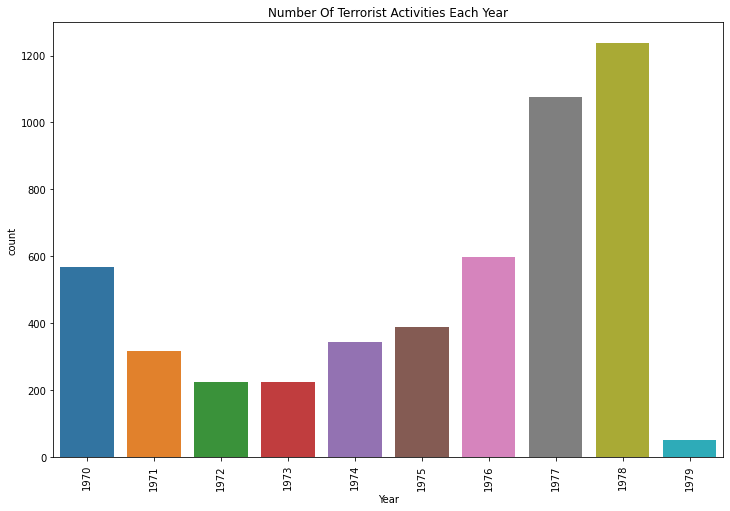

In [ ]:
#Yearly Count of Terrorist Attack-

plt.figure(figsize=(12,8))
sns.countplot(x="Year", data=dataset)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

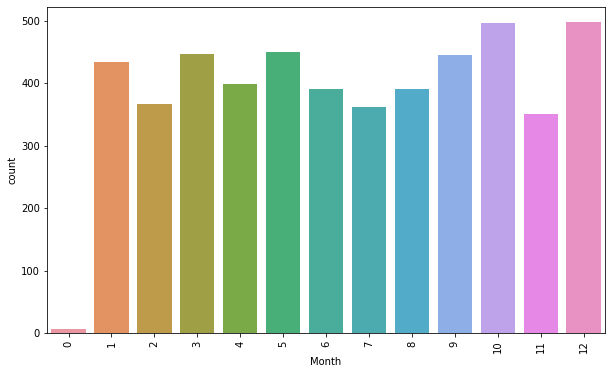

In [ ]:
#month analysis
dataset['Month'].value_counts()
plt.figure(figsize = (10, 6))
sns.countplot(x='Month', data = dataset)
plt.xticks(rotation=90)
plt.show()

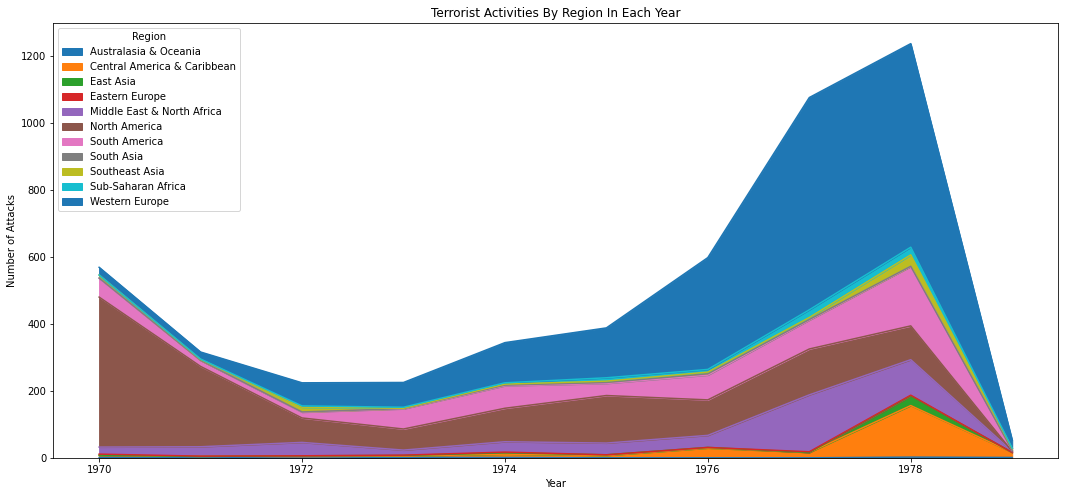

In [ ]:
#Terrorist Activities By Region In Each Year
pd.crosstab(dataset.Year, dataset.Region).plot(kind='area',figsize=(18,8))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
dataset['Wounded'] = dataset['Wounded'].fillna(0).astype(int)
dataset['Killed'] = dataset['Killed'].fillna(0).astype(int)
dataset['casualities'] = dataset['Killed'] + dataset['Wounded']

In [ ]:
terror1 = dataset.sort_values(by='casualities',ascending=False)[:40]

In [ ]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [ ]:
heat.head(10)

Year,1970,1972,1973,1974,1975,1976,1977,1978
Country,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,52.5,0.0,0.0
Barbados,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0
Greece,0.0,0.0,60.0,88.0,0.0,0.0,0.0,0.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0
Iraq,0.0,0.0,0.0,0.0,0.0,295.0,0.0,0.0
Israel,0.0,98.0,0.0,75.5,68.0,0.0,0.0,71.0
Italy,0.0,0.0,80.0,85.0,0.0,0.0,0.0,0.0
Kenya,0.0,0.0,0.0,0.0,127.0,0.0,0.0,0.0
Lebanon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.0


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#A52A2A'],  [.6,'#76EE00'],  [1, '#008B8B']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

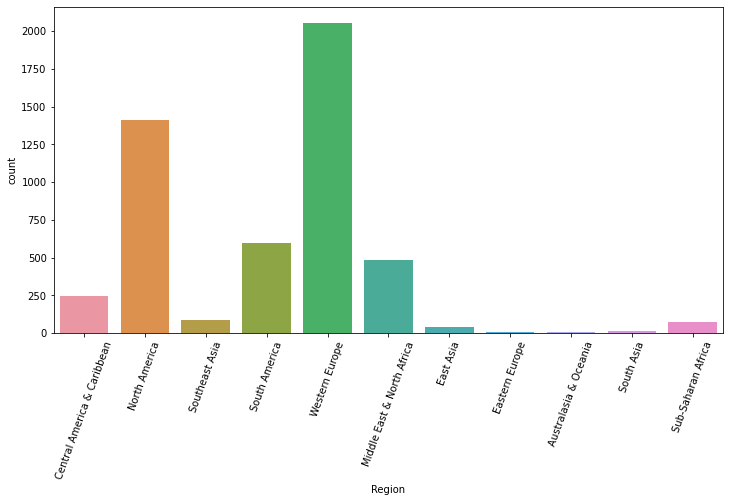

In [ ]:
#REGION AFFECTED BY TERRORIST ATTACK
dataset['Region'].value_counts()
plt.figure(figsize=(12,6
                   ))
sns.countplot(x='Region',data=dataset)
plt.xticks(rotation=70)
plt.show()


In [ ]:
#Counting the Yearly Casualities-
year_cas = dataset.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
px.bar(data_frame=year_cas,x = 'Year',y = 'Casualities',color='Casualities',template='plotly_dark')

In [31]:
#Observation
#It is observed that 2015 marks the highest Casualities records.

#Type of Target Attacks
target = list(dataset['Target_type'])
target_map = dict(Counter(target))
target_df = pd.DataFrame(target_map.items())
target_df.columns = ['Target Type','Count']
px.bar(data_frame=target_df,x = 'Target Type',y = 'Count',color='Target Type',template='plotly_white')

In [32]:
# Observation
# Private Citizens and Property Counts the highest amongst all.

# Analysing the Type of Attacks:-
#Counting the Casuallities according the Attack Type
AttackType=dataset.pivot_table(columns='AttackType',values='Casualities',aggfunc='sum')
AttackType = AttackType.T
AttackType['Type'] = AttackType.index

In [33]:
#plotting the Attack Type
labels = AttackType.columns.tolist()
attack=AttackType.T
values=attack.values.tolist()
values = sum(values,[])
attack_type = list(dataset['AttackType'].unique())
fig = go.Figure(data=[go.Pie(labels = attack_type,values=values,hole=.3)])
fig.update_layout(template = 'gridon')
fig.show()

Text(0.5, 1.0, 'Favorite Targets')

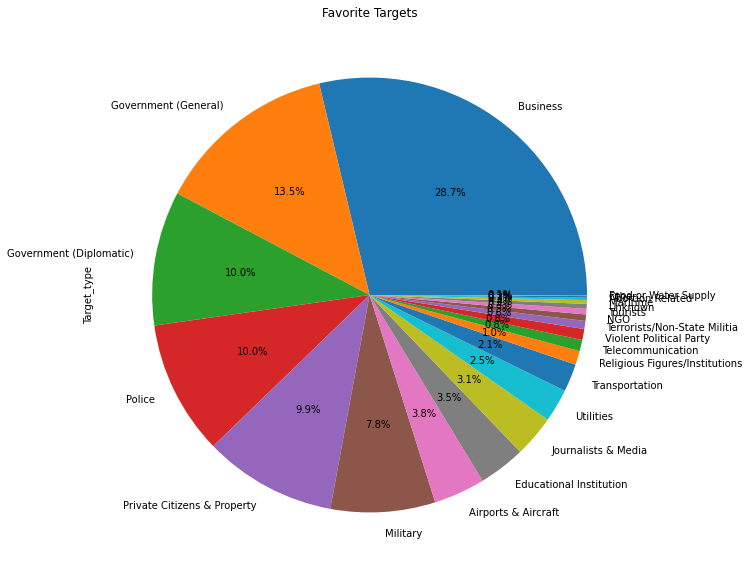

In [34]:
dataset['Target_type'].value_counts().plot(kind='pie',figsize=[12,10],autopct='%1.1f%%')
plt.title('Favorite Targets')

In [35]:
# Observation
# Bombing and Explosion method shows the highest chossen type.

# Count of Weapon Chssen for Attack.
from collections import Counter
values = list(dataset['AttackType'])
value_map = dict(Counter(values))
value_dataset = pd.DataFrame(value_map.items())
value_dataset.columns = ["AttackType","Count of Attack Type"]
px.bar(data_frame=value_dataset,x = 'AttackType',y = 'Count of Attack Type',color = 'AttackType',template="plotly_white")

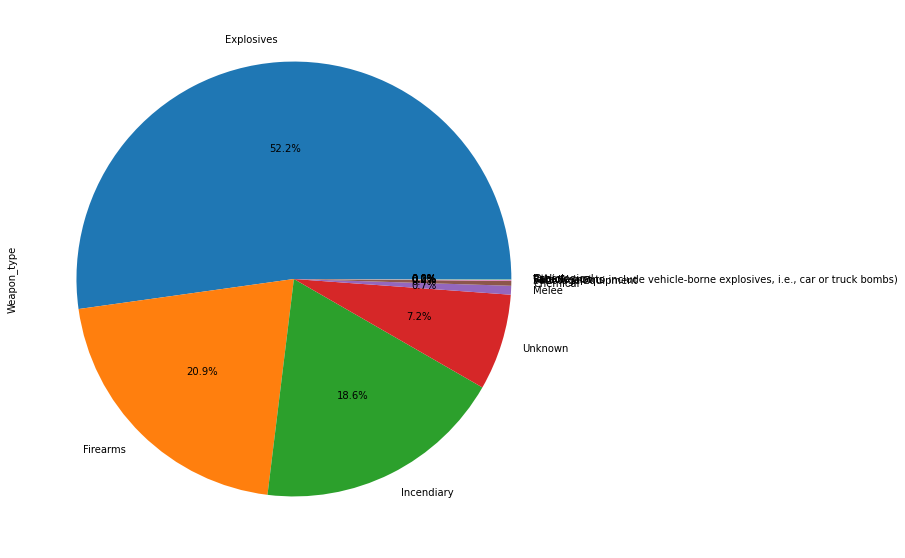

In [38]:
dataset['Weapon_type'].value_counts().plot(kind='pie',figsize=[15,10],autopct='%1.1f%%')

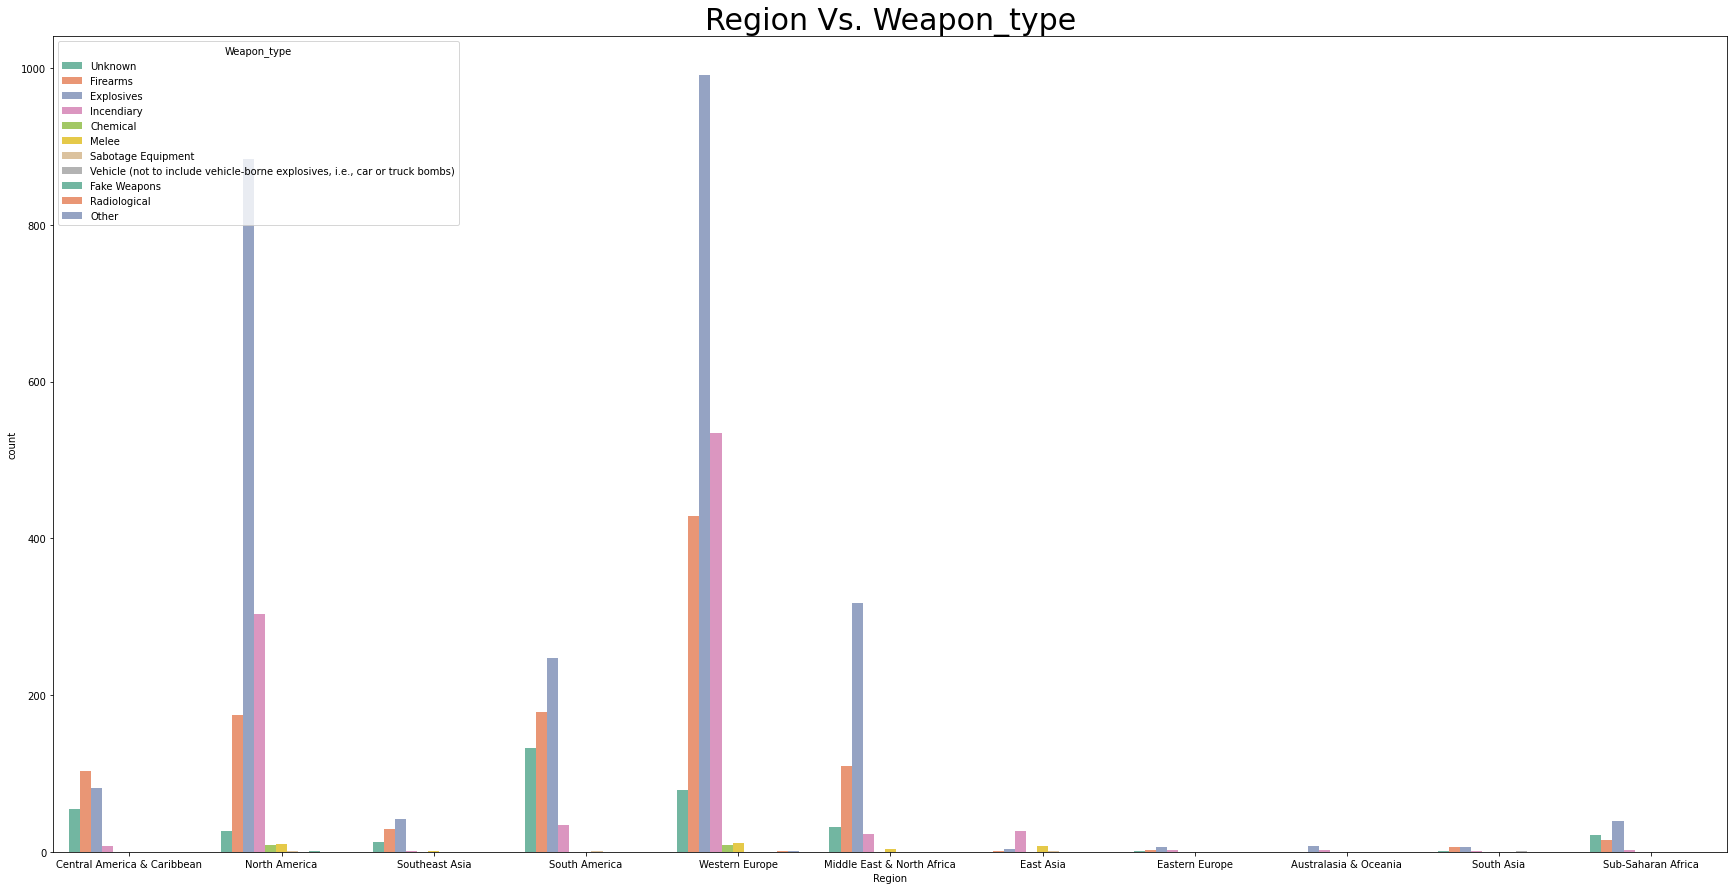

In [39]:
plt.subplots(figsize = (30,15))
sns.countplot(x="Region", hue ='Weapon_type', data = dataset,palette = "Set2")
plt.title('Region Vs. Weapon_type', fontsize = 30)
plt.show()

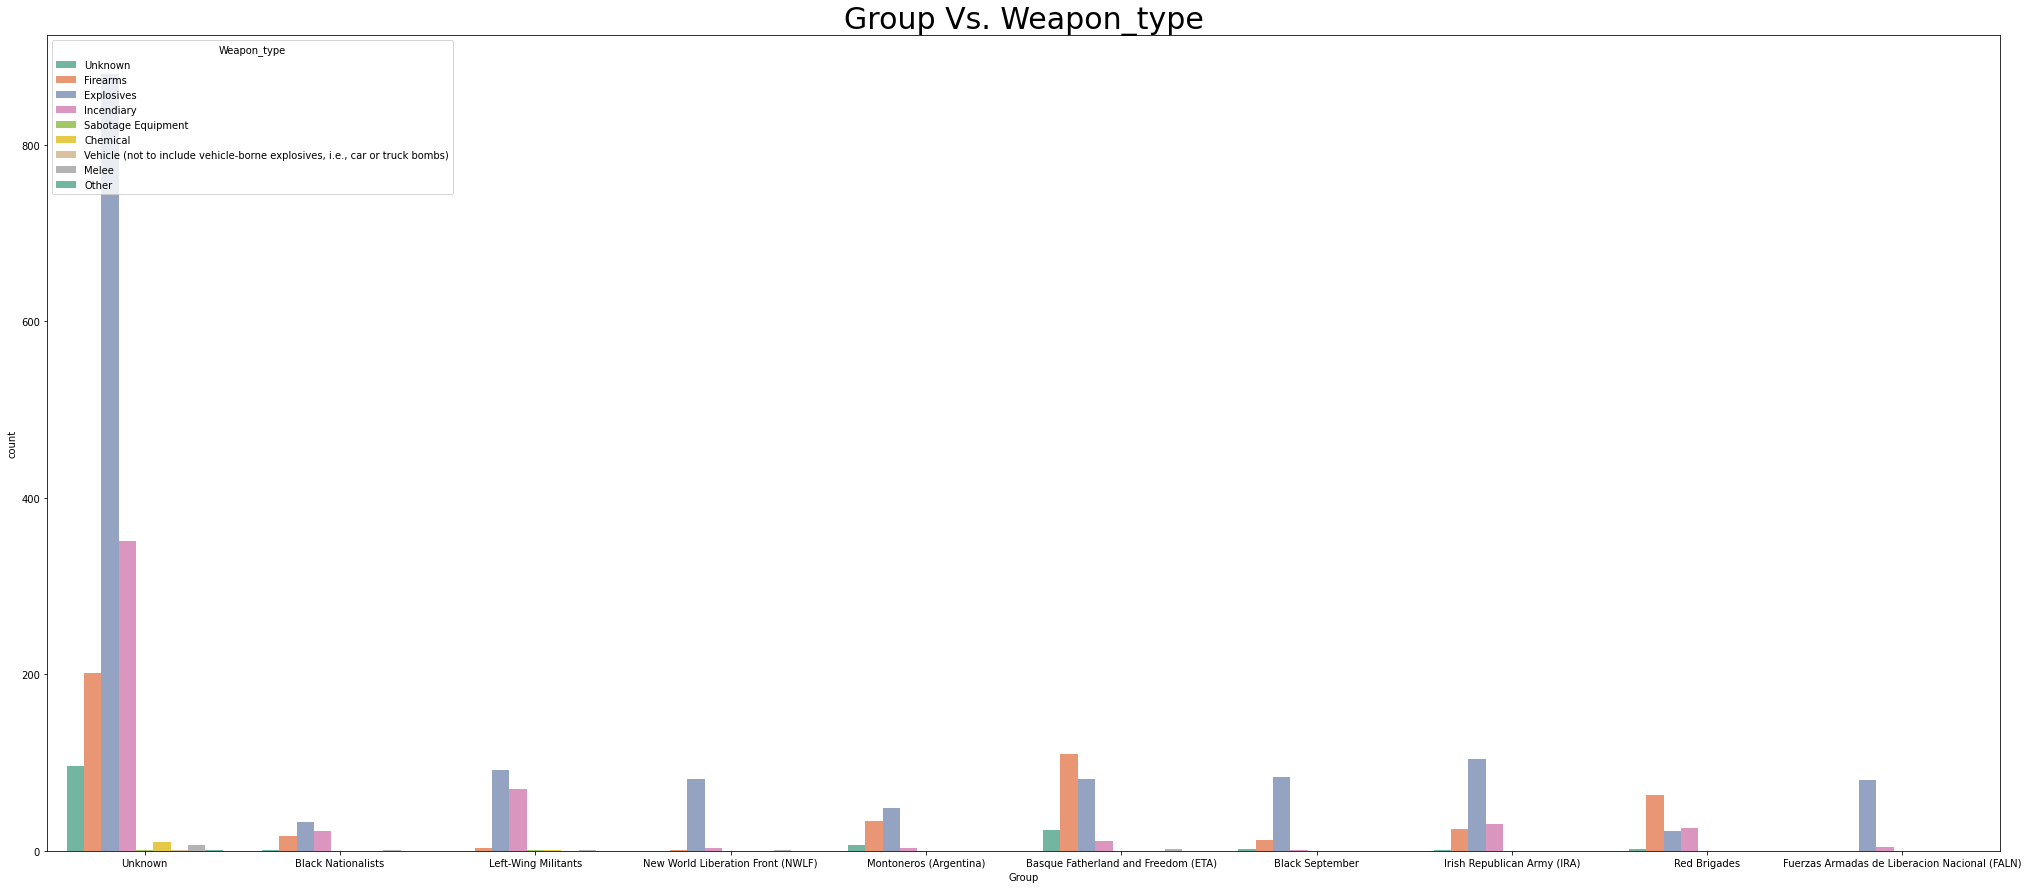

In [40]:
plt.subplots(figsize = (35,15))
Top_10_Group = dataset['Group'].value_counts().index.tolist()[0:10]
snap = dataset[['Group','Weapon_type']]
AttackG_Weapon = snap[snap['Group'].isin(Top_10_Group)]
sns.countplot(x='Group', hue ='Weapon_type', data = AttackG_Weapon,palette = "Set2")
plt.title('Group Vs. Weapon_type', fontsize = 30)
plt.show()

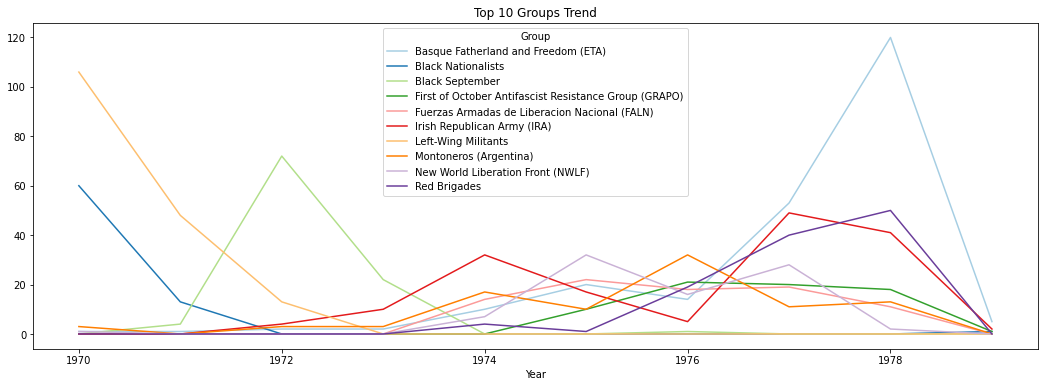

In [41]:
top_groups10=dataset[dataset['Group'].isin(dataset['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Groups Trend")
plt.show()

In [42]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# Observation
# Again, Bombing and Explosion shows the highest.

# Plotting the HOT-ZONE of Terrorism on the highest year of Terrorist Attack i.e. 2014.
import folium
from folium.plugins import MarkerCluster
year=dataset[dataset['Year']==2014]
mapData=year.loc[:,'City':'longitude']
mapData=mapData.dropna().values.tolist()

map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(mapData)):
    folium.Marker(location=[mapData[point][1],mapData[point][2]],
                  popup = mapData[point][0]).add_to(markerCluster)
map

In [44]:
dataset.Country.value_counts()[:15]

United States         1320
Italy                  759
Spain                  479
Turkey                 268
Argentina              240
France                 215
Colombia               211
United Kingdom         195
West Germany (FRG)     155
Greece                 127
El Salvador             92
Mexico                  83
Nicaragua               76
Israel                  58
Iran                    55
Name: Country, dtype: int64

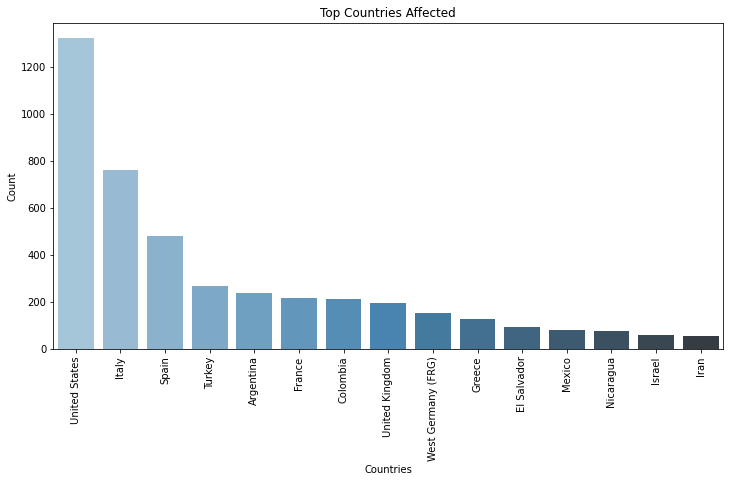

In [45]:
# Top Countries affected by Terror Attacks
plt.subplots(figsize=(12,6))
sns.barplot(dataset['Country'].value_counts()[:15].index,dataset['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [46]:
# Observation
# Iraq shows the highest Terror Attacks followed by other Middle-east region.

# Top 15 Countries showing the Highest Terror Attack.
plt.figure(figsize=(12,6))
country_attack=dataset.Country.value_counts()[:15].reset_index()
country_attack.columns= ["Country", "Total Attacks"]
px.bar(data_frame= country_attack,x = 'Country',y = 'Total Attacks',color = 'Country',template='plotly_white')

<Figure size 864x432 with 0 Axes>

In [47]:
# Observation
# Iraq, again the highest followed by Pakistan, Afganistan and India.

# Counting the Total Number of Casualities in each Country.
plt.figure(figsize=(12, 6))
cas_count= dataset.groupby("Country").Casualities.sum().to_frame().reset_index().sort_values("Casualities", ascending=False)[:15]
px.bar(data_frame=cas_count,x = 'Country',y = 'Casualities',color='Country',template='plotly_white')

<Figure size 864x432 with 0 Axes>

In [48]:
# Count of Terror Attack Region-Wise.
region_attacks = dataset.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
fig = px.bar_polar(data_frame=region_attacks,r = 'Total Attacks',theta='Region',color = 'Region',
                  template="ggplot2", color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()